In [20]:
df = pd.read_parquet('yelp.parquet').sample(n=300)
df

,stars,userid,reviewid,businessid,cat109,cat363,cat361,cat366,cat344,cat33,...,wend2,wend3,wend4,wend5,ureviewcnt,ustars,vuseful,vfunny,vcool,gender
6475,3,217036113,-1391182668,-1238864759,1988124248,1988124248,1988124248,696087777,1988124248,1988124248,...,0,1,0,1,84,3.45,-386187688,-288832847,85273170,530981620
3026,4,-1758936752,-1927277803,1403817592,1988124248,1988124248,1988124248,1988124248,1988124248,1988124248,...,9,6,5,3,40,3.42,1879002950,944065163,-1401210078,71845068
16265,4,-859354028,-288634321,993091903,696087777,1988124248,1988124248,1988124248,1988124248,1988124248,...,0,7,5,7,25,3.96,860035221,-132918897,-1057351352,530981620
7730,3,60989912,870417350,-374483666,696087777,1988124248,1988124248,1988124248,1988124248,1988124248,...,8,8,5,4,115,3.61,1312092113,393838775,106757232,530981620
17585,4,1763289916,-1935920080,-131334149,696087777,1988124248,1988124248,1988124248,1988124248,1988124248,...,4,8,6,10,8,4.38,1796998381,-1041903523,-768484170,71845068
223,4,944047163,-215127935,490757627,1988124248,1988124248,1988124248,1988124248,1988124248,1988124248,...,3,5,2,1,192,3.78,740581065,168859708,-50429891,530981620
11206,5,-1368148662,161063282,-419840901,1988124248,1988124248,1988124248,1988124248,1988124248,1988124248,...,0,1,3,7,10,4.40,972445202,-1721654386,1879002950,71845068
8702,4,-1589318268,1109960529,1433862770,696087777,1988124248,1988124248,1988124248,1988124248,1988124248,...,0,1,4,6,15,2.93,94926449,-1823081949,1023896466,71845068
3725,2,1374668590,-1600656184,-1500135190,696087777,1988124248,1988124248,1988124248,1988124248,1988124248,...,0,5,2,4,108,3.74,-832039789,-1611685654,1792255000,530981620
21019,5,1157127998,-1366492495,-271625982,1988124248,1988124248,1988124248,1988124248,1988124248,1988124248,...,9,7,6,4,27,3.89,-319098976,-397064898,1023896466,71845068


In [22]:
# Selects some features based on LightGBM importance ratios
df = df[['stars', 'bstars', 'ustars', 'ureviewcnt', 'breviewcnt', 'longitude', 'latitude', 'userid', 'vuseful', 'vcool', 'wday5', 'cat109', 'reviewid', 'businessid']
]

# Applies some transformations
df['breviewcnt'] = np.log10(df['breviewcnt'] + 1)
df['ureviewcnt'] = np.log10(df['ureviewcnt'] + 1)
df = df.drop(['wday5', 'cat109'], axis=1)
df

,stars,bstars,ustars,ureviewcnt,breviewcnt,longitude,latitude,userid,vuseful,vcool,reviewid,businessid
6475,3,-2030303457,3.45,1.929419,1.113943,78808076,-1860684977,217036113,-386187688,85273170,-1391182668,-1238864759
3026,4,1290556682,3.42,1.612784,2.113943,-1668394454,-1972441437,-1758936752,1879002950,-1401210078,-1927277803,1403817592
16265,4,1290556682,3.96,1.414973,2.544068,1908447048,-1180407577,-859354028,860035221,-1057351352,-288634321,993091903
7730,3,1075969934,3.61,2.064458,2.123852,-865252976,744978810,60989912,1312092113,106757232,870417350,-374483666
17585,4,1290556682,4.38,0.954243,2.814913,-1272883416,48210141,1763289916,1796998381,-768484170,-1935920080,-131334149
223,4,-520823589,3.78,2.285557,0.778151,-1731459498,-1057849755,944047163,740581065,-50429891,-215127935,490757627
11206,5,1290556682,4.40,1.041393,1.477121,933206662,1379999834,-1368148662,972445202,1879002950,161063282,-419840901
8702,4,1290556682,2.93,1.204120,2.264818,1283138577,580251946,-1589318268,94926449,1023896466,1109960529,1433862770
3725,2,-520823589,3.74,2.037426,1.301030,909392924,87162986,1374668590,-832039789,1792255000,-1600656184,-1500135190
21019,5,1290556682,3.89,1.447158,2.209515,-1807147166,906868664,1157127998,-319098976,1023896466,-1366492495,-271625982


In [25]:
X = df[df.columns[df.columns != 'stars']]
y = df['stars']

In [26]:
np.unique(y)

array([1, 2, 3, 4, 5], dtype=int32)

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
tf = pca.fit_transform(X)

In [29]:
print('components: {0}'.format(pca.components_))
print('mean: {0}'.format(pca.mean_))
print('covariance: {0}'.format(pca.get_covariance))
print('contribution ratio: {0}'.format(pca.explained_variance_ratio_))
print('accumulated contribution ratio: {0}'.format(sum(pca.explained_variance_ratio_)))

components: [[-4.49555024e-02 -2.20493623e-11  1.22738315e-11 -2.30904251e-11
   2.09444672e-01 -6.81909633e-01  2.57970957e-01  2.85994657e-01
  -2.27727068e-01 -2.11654182e-01 -4.94077034e-01]
 [-3.68099204e-01 -3.27111671e-11 -2.73984576e-11 -1.60151688e-12
   2.16391764e-01 -1.98159764e-01 -4.80995946e-01 -3.95824408e-02
  -1.87285144e-01 -5.55681216e-01  4.49031269e-01]]
mean: [ 2.22274954e+08  3.76916667e+00  1.65314443e+00  1.69197054e+00
  1.94710179e+07  1.69817551e+07 -3.17165834e+07 -3.88168624e+07
  1.13988169e+08 -7.69333224e+07 -1.54159780e+07]
covariance: <bound method _BasePCA.get_covariance of PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)>
contribution ratio: [0.15606816 0.14358868]
accumulated contribution ratio: 0.2996568303325116


Text(0.5, 1.0, 'principal component')

Text(0.5, 0, 'pc1')

Text(0, 0.5, 'pc2')

Text(0.5, 1.0, 'principal component')

Text(0.5, 0, 'pc1')

Text(0, 0.5, 'pc2')

Text(0.5, 1.0, 'principal component')

Text(0.5, 0, 'pc1')

Text(0, 0.5, 'pc2')

Text(0.5, 1.0, 'principal component')

Text(0.5, 0, 'pc1')

Text(0, 0.5, 'pc2')

Text(0.5, 1.0, 'principal component')

Text(0.5, 0, 'pc1')

Text(0, 0.5, 'pc2')

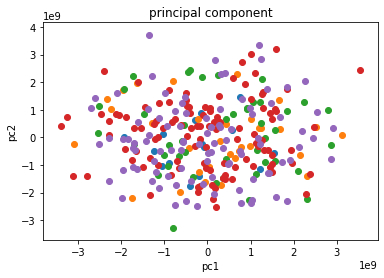

In [30]:
from matplotlib import pyplot as plt

for label in np.unique(y):
    plt.scatter(tf[y == label, 0], tf[y == label, 1])
    plt.title('principal component')
    plt.xlabel('pc1')
    plt.ylabel('pc2')
    
plt.show()

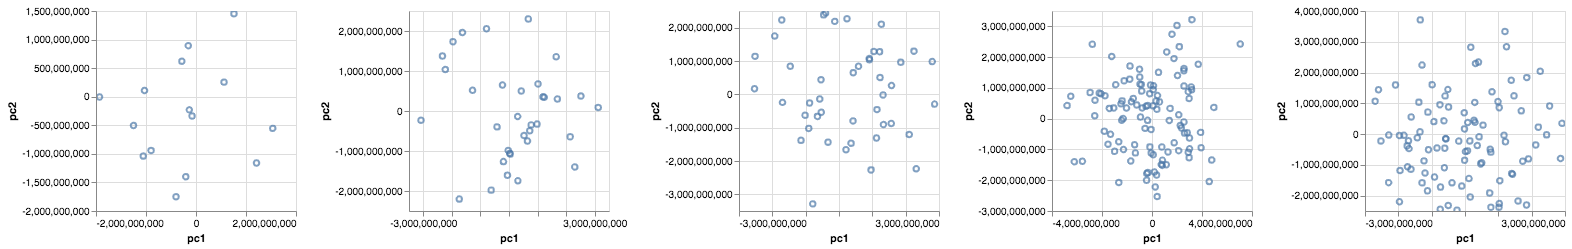

In [31]:
import altair as alt

plots = []

for label in np.unique(y):
    pcs = pd.DataFrame({'pc1': tf[y == label, 0], 'pc2': tf[y == label, 1]})
    plot = alt.Chart(pcs).mark_point().encode(x='pc1', y='pc2').properties(width=200, height=200).interactive() 
    plots.append(plot)

alt.hconcat(*plots)